In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diversity=pd.read_excel(r"HR+Diversity+problem.xlsx")

In [3]:
diversity.head(10)

,Gender,RaceDesc,Position,MaritalDesc,Department,EmpSatisfaction
0,M,White,Production Technician I,Single,Production,5
1,F,White,Production Technician II,Married,Production,3
2,F,White,Production Technician I,Married,Production,5
3,M,White,Production Manager,Divorced,Production,3
4,F,White,Production Technician I,Divorced,Production,4
5,F,White,Production Technician I,Single,Production,5
6,F,White,Software Engineer,Single,Software Engineering,3
7,M,White,Production Technician I,Widowed,Production,4
8,F,Two or more races,Production Technician I,Single,Production,3
9,M,White,IT Support,Divorced,IT/IS,5


In [4]:
diversity.tail()

,Gender,RaceDesc,Position,MaritalDesc,Department,EmpSatisfaction
254,M,White,Production Technician II,Single,Production,3
255,F,White,Production Technician II,Single,Production,4
256,M,White,Production Technician II,Single,Production,4
257,F,Asian,Production Technician I,Single,Production,2
258,F,Asian,Production Technician I,Widowed,Production,5


In [5]:
diversity.shape

(259, 6)

In [6]:
diversity.isnull().sum()

Gender             0
RaceDesc           0
Position           0
MaritalDesc        0
Department         0
EmpSatisfaction    0
dtype: int64

In [7]:
import sklearn

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
diversity[diversity.select_dtypes(include=['object']).columns]=diversity[diversity.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [11]:
diversity.head(80)

,Gender,RaceDesc,Position,MaritalDesc,Department,EmpSatisfaction
0,1,3,5,3,1,5
1,0,3,6,1,1,3
2,0,3,5,1,1,5
3,1,3,4,0,1,3
4,0,3,5,0,1,4
5,0,3,5,3,1,5
6,0,3,7,3,3,3
7,1,3,5,4,1,4
8,0,2,5,3,1,3
9,1,3,2,0,0,5


In [12]:
diversity.describe()

,Gender,RaceDesc,Position,MaritalDesc,Department,EmpSatisfaction
count,259.000000,259.00000,259.000000,259.000000,259.000000,259.000000
mean,0.405405,2.27027,4.575290,1.942085,1.081081,3.872587
std,0.491921,1.09098,1.891722,1.148189,0.568206,0.920893
min,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.00000,5.000000,1.000000,1.000000,3.000000
50%,0.000000,3.00000,5.000000,2.000000,1.000000,4.000000
75%,1.000000,3.00000,6.000000,3.000000,1.000000,5.000000
max,1.000000,3.00000,8.000000,4.000000,3.000000,5.000000


C:\Users\vaibhav\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
C:\Users\vaibhav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


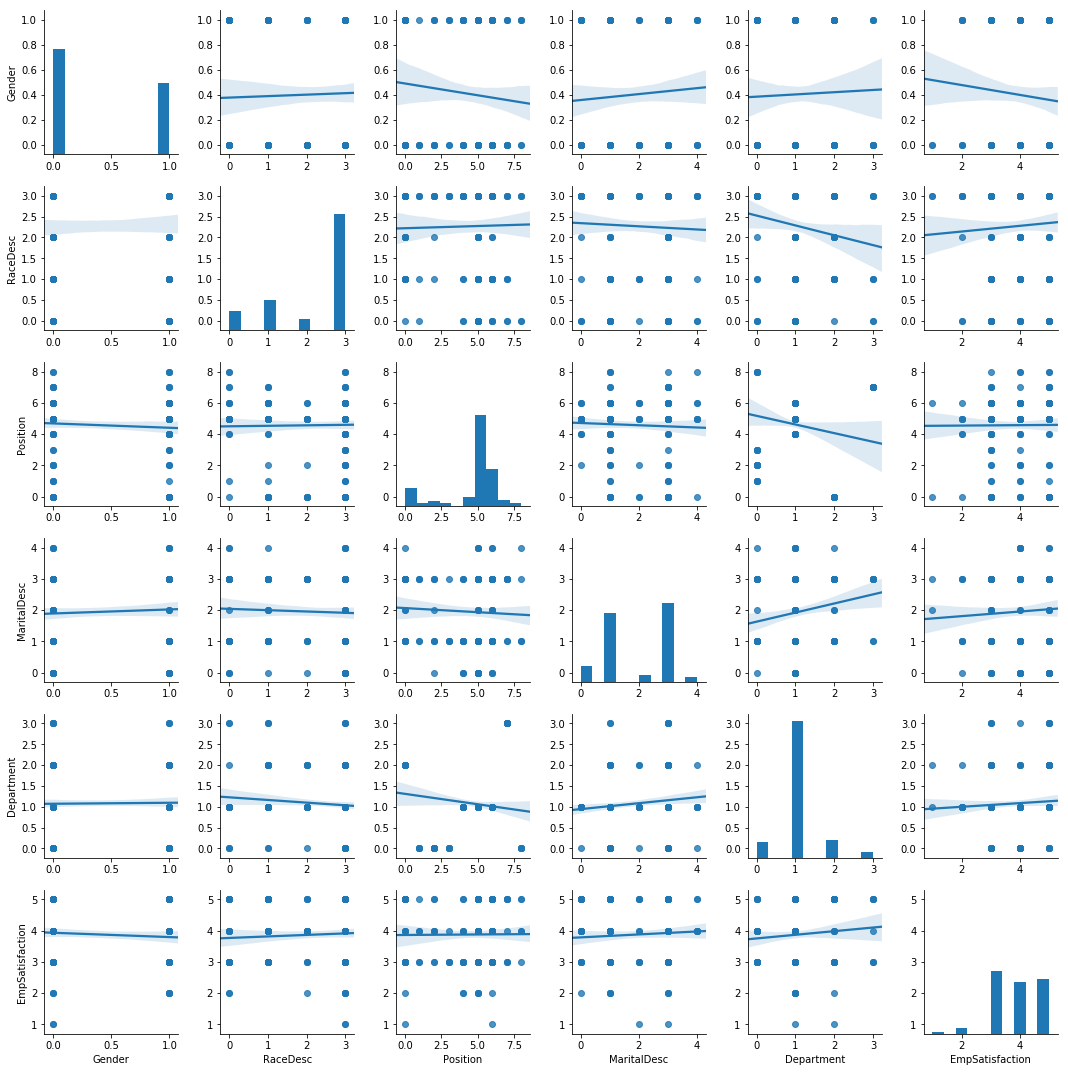

In [13]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(diversity, kind="reg")
plt.show()

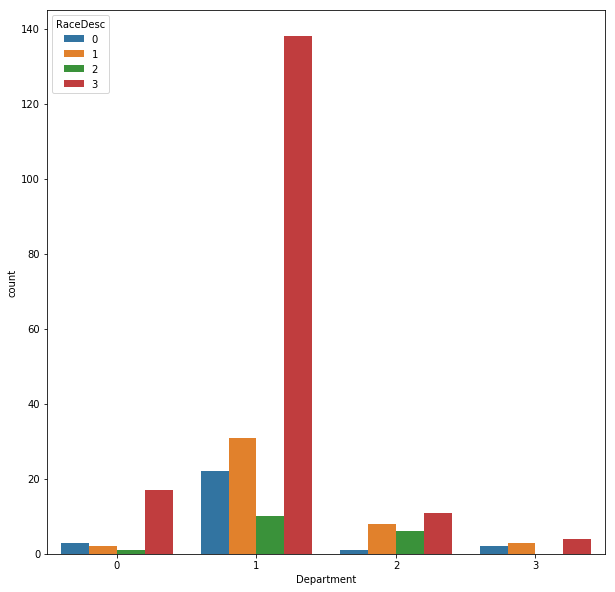

In [14]:
plt.figure(figsize=(10, 10))
g = sns.countplot(x='Department', hue='RaceDesc', data=diversity)

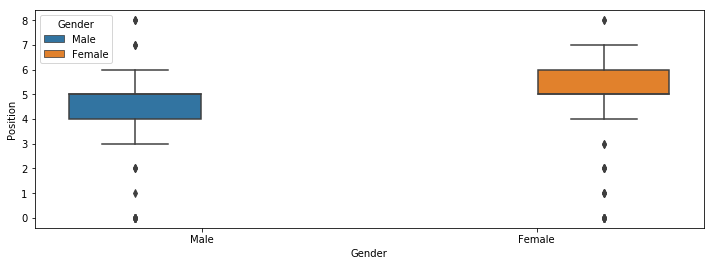

In [15]:
diversity["Gender"] = diversity.Gender.replace({1: "Male", 0: "Female"})
plt.figure(figsize=(12, 4))
sns.boxplot(x = "Gender", y = "Position", hue = "Gender", data=diversity)

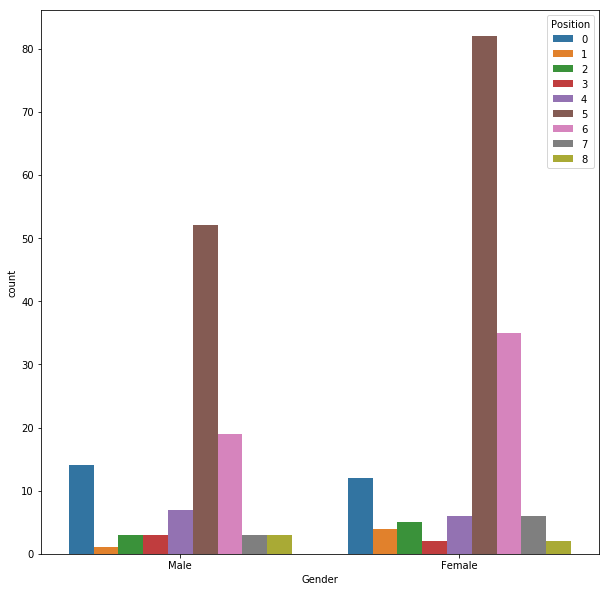

In [16]:
plt.figure(figsize=(10, 10))
g = sns.countplot(x='Gender', hue='Position', data=diversity)

In [42]:

writer = pd.ExcelWriter('submission.xlsx', engine='xlsxwriter')
diversity.to_excel(writer, sheet_name='Sheet1')

workbook = writer.book
worksheet = writer.sheets['Sheet1']

chart = workbook.add_chart({'type': 'column'})